# GeoSIR Introduction

This tutorial will briefly introduce the epidemiological and compartmental GeoSIR simulation model. [A brief overview may be found here](https://calisim-examples-workshop-material.readthedocs.io/en/latest/workshops/geosir.html).

# Imports

We will first import all required dependencies.

In [47]:
from geosir_network import GeoSir
import networkx as nx
import matplotlib.pyplot as plt

N_DAYS = 30
POP_SIZE = 250
NETWORK_GRID_TYPE = 1

# Data

GeoSIR wil generate epidemiological time series data and dynamic contact networks. The data includes the number of agents within each compartment, alongside key epidemiological quantities such as $R_0$

In [34]:
model = GeoSir(
    pop_size=POP_SIZE, 
    init_infected=0.25, 
    exposure_distance=350, 
    infection_risk=0.4, 
    network_grid_type = NETWORK_GRID_TYPE
)
model.run(N_DAYS)

We can view a time series of the model states over time steps.

In [35]:
state_df = model.get_states_df()
state_df

,susceptible,infected,recovered,dead,safe,hotspot,t,contact_r_e,contact_r_0t,proxy_contact_r0
0,147,82,13,8,0,5,1,2.147287,3.651848,2.434566
1,127,83,29,11,0,5,2,1.741935,3.429007,2.832342
2,118,70,43,19,0,5,3,1.453333,3.079096,2.902843
3,111,51,60,28,0,5,4,1.370968,3.087765,2.943937
4,109,36,74,31,0,5,5,1.276596,2.927972,2.941034
5,107,31,76,36,0,5,6,1.195652,2.793580,2.918349
6,106,23,82,39,0,5,7,1.225000,2.889151,2.914456
7,106,18,85,41,0,5,8,1.255814,2.961825,2.920029
8,106,13,88,43,0,5,9,1.200000,2.830189,2.910572
9,106,8,92,44,1,4,10,1.173913,2.768663,2.897057


<Axes: xlabel='t', ylabel='infected'>

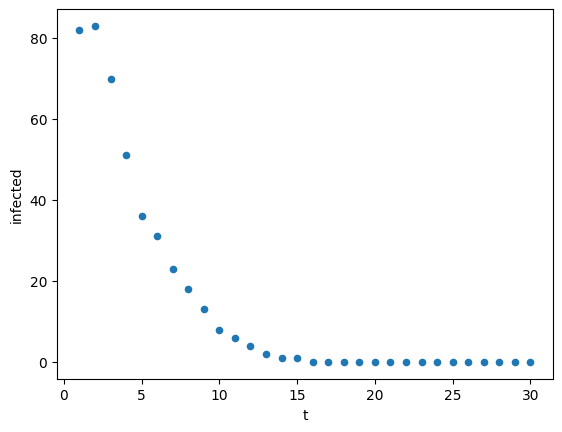

In [36]:
state_df.plot.scatter("t", "infected")

<Axes: xlabel='t', ylabel='dead'>

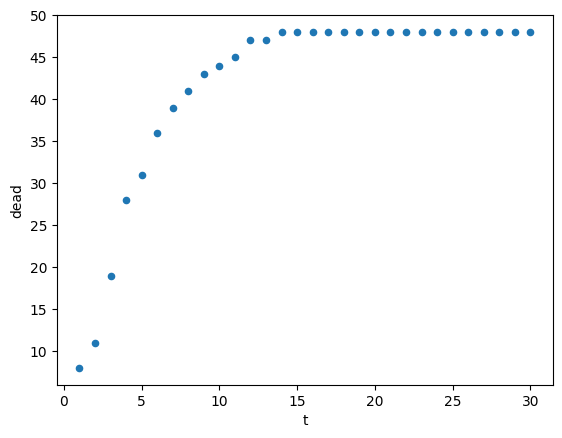

In [37]:
state_df.plot.scatter("t", "dead")

We can also view the contact networks created during the simulation. Let's plot the end-of-simulation (day 30) contact network.

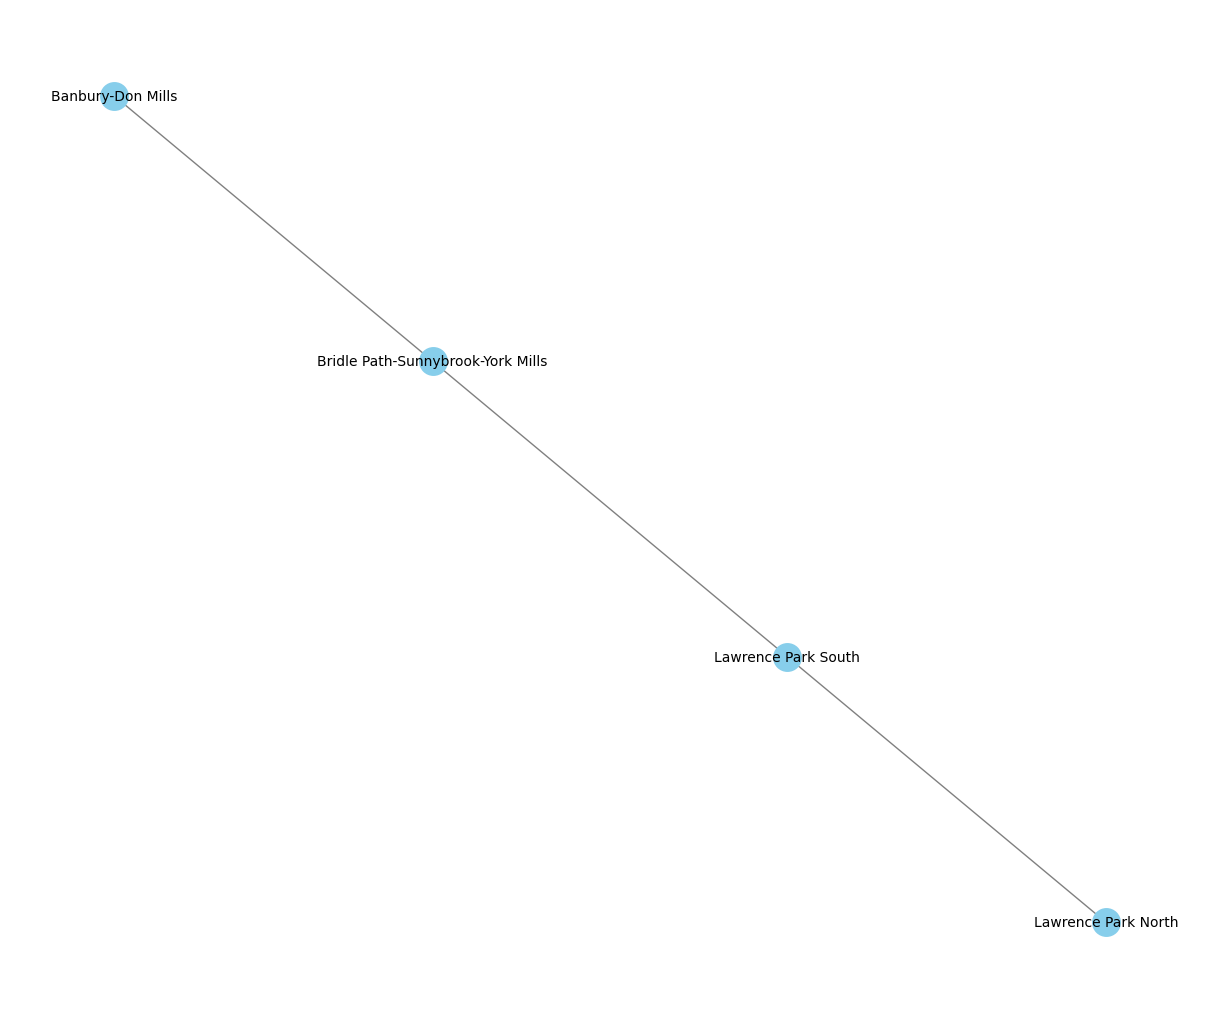

In [51]:
node_df = model.get_node_df().query("t == 30")
edge_df = model.get_edge_df().query("t == 30")

locations = {
    i: n.HOOD
    for i, n in enumerate(model.init_neighbourhoods())
}
for k in ["from", "to"]:
    edge_df[k] = edge_df[k].replace(locations)
edge_df = edge_df[edge_df['from'] != edge_df['to']]

G = nx.from_pandas_edgelist(edge_df, source='from', target='to', create_using=nx.Graph())
pos = nx.spring_layout(G) 

plt.figure(figsize=(12, 10)) 
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=250, edge_color='gray', linewidths=5, font_size=10)
plt.show()

We can view both node and edge properties at day 30.

In [54]:
node_df

,t,node_id,state,infected_at_t,total_infected,people_at_t,total_people,location,x,y
145,30,0,safe,0,99,40,1203,Lawrence Park South,-8.839445e+06,5.421780e+06
146,30,1,safe,0,154,40,1276,Lawrence Park North,-8.839214e+06,5.423757e+06
147,30,2,safe,0,35,29,910,St.Andrew-Windfields,-8.836438e+06,5.427797e+06
148,30,3,safe,0,36,35,1053,Bridle Path-Sunnybrook-York Mills,-8.836407e+06,5.423904e+06
149,30,4,safe,0,43,36,1122,Banbury-Don Mills,-8.833165e+06,5.424927e+06


In [55]:
edge_df

,t,from,to,agent_type,from_state,to_state,contact_type
199,30,Lawrence Park South,Lawrence Park North,neighbourhood,safe,safe,infected
200,30,Lawrence Park South,Bridle Path-Sunnybrook-York Mills,neighbourhood,safe,safe,infected
204,30,Bridle Path-Sunnybrook-York Mills,Banbury-Don Mills,neighbourhood,safe,safe,infected
